#**Classification des images d'un test de biopsie de la maladie celiac disease en utilisant des réseaux de neurones convolutionnels (CNN )**

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D , Activation,  Flatten, Dense
from keras import backend as K


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [ ]:
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

In [ ]:
es= [ EarlyStopping(monitor='val_accuracy', patience=20, verbose=1) ]

In [ ]:
img_width = 1000
img_height = 1000

train_data_dir = '/content/drive/MyDrive/celiac disease/database/train'
validation_data_dir = '/content/drive/MyDrive/celiac disease/database/val'
train_samples = 60
validation_samples = 12
epochs = 100  #combien de fois il va parcourir tout les données
batch_size = 8

input_shape = (img_width, img_height, 3)

In [ ]:
model = tf.keras.Sequential()
# 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding='same',activation=tf.keras.activations.relu, input_shape=(1000, 1000, 3)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding='same',activation=tf.keras.activations.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
    # 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', activation=tf.keras.activations.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=2, padding='same'))
    # 3
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation=tf.keras.activations.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
    # 4

# model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding='same', activation=tf.keras.activations.relu))
# model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding='same', activation=tf.keras.activations.relu))
# model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding='same', activation=tf.keras.activations.relu))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(units=6, activation=tf.keras.activations.softmax))

In [ ]:
import keras
from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'], run_eagerly=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Data Augmentation is a method of artificially creating a new dataset for training from
# the existing training dataset to improve the performance of deep learning neural network
# with the amount of data available. It is a form of regularization which makes our model generalize better
# than before.

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True)

In [ ]:
# this is the augmentation configuration we will use for testing:
# only rescaling, avoiding having same training and validation data.
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 60 images belonging to 6 classes.


In [ ]:
print(train_generator.class_indices)

{'marsh1': 0, 'marsh2': 1, 'marsh3a': 2, 'marsh3b': 3, 'marsh3c': 4, 'normal': 5}


In [ ]:
imgs, labels = next(train_generator)

In [ ]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

8
[0. 1. 0. 0. 0. 0.]


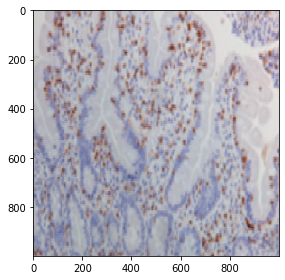

[0. 1. 0. 0. 0. 0.]


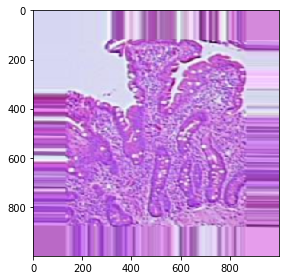

[0. 1. 0. 0. 0. 0.]


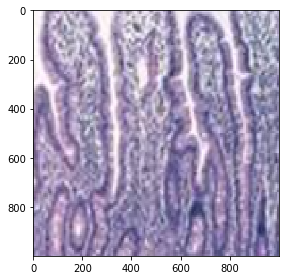

[0. 0. 0. 0. 1. 0.]


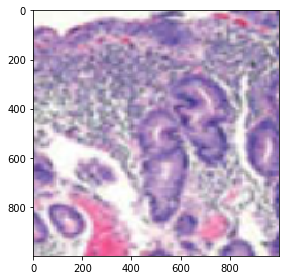

[0. 0. 0. 0. 0. 1.]


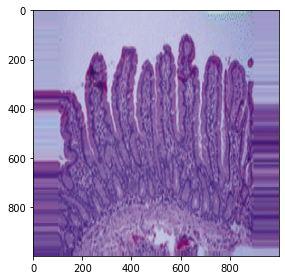

[0. 0. 1. 0. 0. 0.]


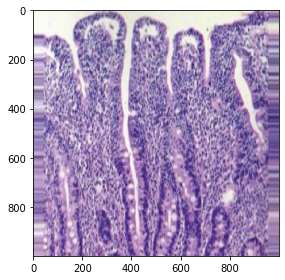

[0. 1. 0. 0. 0. 0.]


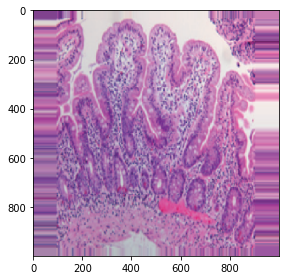

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,7):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [ ]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 12 images belonging to 6 classes.


In [ ]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=100,
    #callbacks=es,
    validation_data=validation_generator, use_multiprocessing=True
    #validation_steps=validation_samples // batch_size
    )

Epoch 1/100
7/7 [==============================] - 194s 27s/step - loss: 3.2564 - accuracy: 0.1346 - val_loss: 1.8424 - val_accuracy: 0.1667
Epoch 2/100
7/7 [==============================] - 184s 24s/step - loss: 1.7896 - accuracy: 0.1923 - val_loss: 1.7957 - val_accuracy: 0.1667
Epoch 3/100
7/7 [==============================] - 193s 26s/step - loss: 1.8302 - accuracy: 0.1786 - val_loss: 1.7961 - val_accuracy: 0.1667
Epoch 4/100
7/7 [==============================] - 189s 24s/step - loss: 1.8082 - accuracy: 0.0769 - val_loss: 1.7920 - val_accuracy: 0.1667
Epoch 5/100
7/7 [==============================] - 185s 24s/step - loss: 1.7949 - accuracy: 0.1731 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 6/100
7/7 [==============================] - 190s 25s/step - loss: 1.7956 - accuracy: 0.1538 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 7/100
7/7 [==============================] - 194s 25s/step - loss: 1.7917 - accuracy: 0.1731 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 8/100
7

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model.save('/content/drive/MyDrive/celiac disease/model.h5')

#testing part !


In [ ]:
model = load_model('/content/drive/MyDrive/celiac disease/model.h5')

In [ ]:
## Now Predict
predict_dir_path='/content/drive/MyDrive/celiac disease/database/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

In [ ]:
# predicting images
from keras.preprocessing import image
normal_counter = 0
marsh1_counter  = 0
marsh2_counter  = 0
marsh3a_counter  = 0
marsh3b_counter  = 0
marsh3c_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(500, 500))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    prediction = model.predict(images, batch_size=16)
    #classes_x=np.argmax(prediction,axis=1)
    classes = prediction[0][0]

    if classes == 0:
        print(file + ": " + 'marsh1')
        marsh1_counter += 1
        print(classes)
    if classes==1:
        print(file + ": " + 'marsh2')
        marsh2_counter += 1
        print(classes)
    if classes==2:
        print(file + ": " + 'marsh3a')
        marsh3a_counter += 1
        print(classes)
    if classes==3:
        print(file + ": " + 'marsh3b')
        marsh3b_counter += 1
        print(classes)
    if classes==4:
        print(file + ": " + 'marsh3c')
        marsh3c_counter += 1
        print(classes)
    if classes==5:
        print(file + ": " + 'normal')
        normal_counter += 1
        print(classes)

In [ ]:
%cd /content/drive/MyDrive/Deep Learning-ItGate/cat_dog_dataset

In [ ]:
model.save('model.h5')

In [ ]:
model.save_weights('model_weight.h5')